# Case 9 - Linear regression and regularization - Part 2


**Context.** 

You are an analyst at a Colombian EPS. This company has found that diabetes has a very high economical and personal cost, so has decided to do something about it.

**Problem.** 

You are requiered to understand what parameters are important on determining the risk that people have on developing diabetes

**Analytical Context.** 

You must use different methods in order to obtain the feature subset of the relevant variables for the model

## Packages Import

In [1]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import cm
from pandas.plotting import scatter_matrix
import statsmodels.graphics.correlation
from statsmodels.stats import diagnostic
from sklearn import datasets
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


## Data Import

In [3]:
diabetes = datasets.load_diabetes(as_frame=True)
df_diabetes = diabetes.data
df_diabetes['age'] = round(abs(df_diabetes['age']*1000))

df_diabetes.head(10)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,38.0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,2.0,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,85.0,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,89.0,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,5.0,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,93.0,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,45.0,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,64.0,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,42.0,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,71.0,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data features are the following:
- **age:** age in years
- **sex**
- **bmi:** body mass index
- **bp:** average blood pressure
- **s1:** tc, total serum cholesterol
- **s2:** ldl, low-density lipoproteins
- **s3:** hdl, high-density lipoproteins
- **s4:** tch, total cholesterol / HDL
- **s5:** ltg, possibly log of serum triglycerides level
- **s6:** glu, blood sugar level

## Exploratory Data Analysis

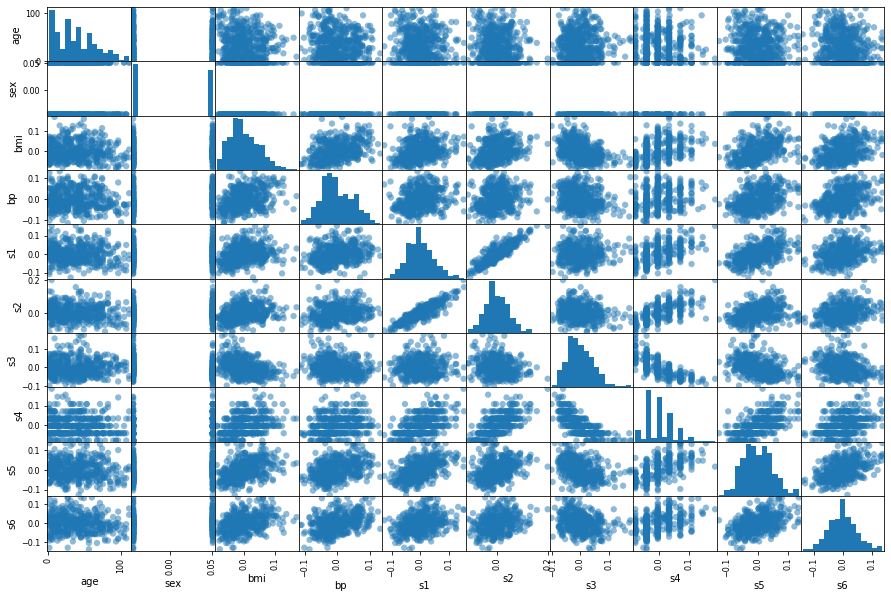

In [4]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(df_diabetes, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,10), cmap=cmap)

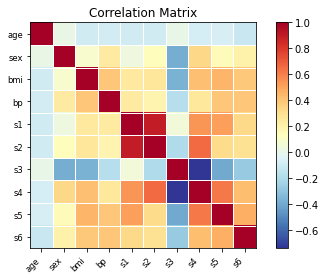

In [5]:
corr_mat = df_diabetes.corr()
statsmodels.graphics.correlation.plot_corr(corr_mat,xnames=df_diabetes.columns, ynames=df_diabetes.columns);

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='s6'>

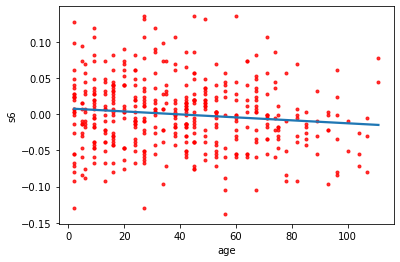

In [6]:
sns.regplot(df_diabetes.age, df_diabetes.s6, order=1, ci=None, scatter_kws={'color':'r', 's':9})

                            OLS Regression Results                            
Dep. Variable:                     s6   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     22.35
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           3.42e-31
Time:                        03:18:36   Log-Likelihood:                 803.49
No. Observations:                 442   AIC:                            -1587.
Df Residuals:                     432   BIC:                            -1546.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

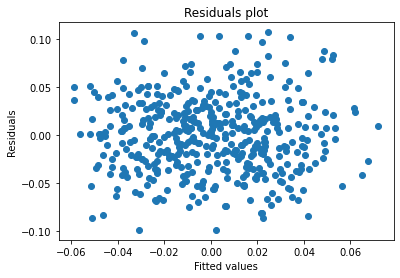

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [7]:
est = smf.ols('s6 ~  age + C(sex) + bmi + bp + s1 + s2 + s3 + s4 + s5', df_diabetes).fit()
print(est.summary())

#Residual plot 
plt.scatter(est.fittedvalues,est.resid)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residuals plot')
plt.show()

dir(est)

## Introduction

Even though linear regression models have a simple and more rigid structure than non-linear models, linear regression models perform surprisingly well. Therefore, before getting into non-linear models, let us see how linear models can be improved upon. Until now, we have seen that linear regression models are estimated by using the simple least squares method. However, using a modification of the least squares method the model's accuracy and interpretability can be improved.

When the number of observations in our sample is considerably larger than the number of predictors  ($n>>m$), the least squares method provides a low variance estimation, which means that it will perform well on validation data. However, when the number of observations is not that much larger than the number of predictors ($n>m$), this variance will increase, which could mean that the model is going to overfit and perform poorly on unseen data. Furthermore, if the number of observations in the sample is smaller than the number of predictors ($n<m$) the least squares method is not even able to find a unique estimation for the parameters, which means that the model's estimation would have an infinite variance. By constraining or **shrinking** the estimations, this problem with variability can be reduced with the cost of a very low increase in bias. 

Another problem with the simple least squares method of estimation is the fact that the model can include multiple irrelevant variables that make the model interpretability much more complex and ambiguous. Nonetheless, linear regression models are not likely to estimate a value of zero to a coefficient, i.e. completely eliminating the effect of that variable. On that account, a process of **variable selection** can help to exclude irrelevant input variables from the model to make it simpler and easier to interpret.

## Subset Selection

The subset selection process is one in which a subset of the $m$ predictors are identified to be related with the response variable. Then, a linear regression model is fit only with the selected subset of predictors. There are different algorithms to make this subset selection.

### Best subset selection

To perform the best subset selection, there has to be a model fit for all of the possible predictors' subsets. Then, all of the models' performance is assesed and the best of the models is selected. In order to make the models' comparison, the algorithm to follow is the one present in the next image:

<figure>
<img src="/work/indu5012_case_8/fig/Best_subset.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 8.1 - Best subset selection algorithm</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 


* **Why is the $R^2$ used in step 2. of this algorithm?**
* **Why is the $R^2$ not used in step 3. of this algorithm (to compare models with different number of coefficients)?**

It is important to always be wary of the fact that the $R^2$ metric will always increase when a new predictor is added to the model, even if the introduced has little to no relation with the output variable. Then, comparing two models with different number of predictors is unfair. Furthermore, as we have seen the $R^2$ metric is only a measure of how well the model fits the training data, which can lead to the selection of overfitting models when used as primary selection criteria. On that account, to compare models with different number of predictors metrics that evaluate the validation error, either directly or indirectly. 

Even though the best subset selection method may be appealing, it has a problem in that it suffers from computational limitations. The number of models that have to be fit for this method increases exponentially as the number of predictors available increases. The number of models that have to be fitted equals $2^m$. So, if there are 10 predictors, approximately 1,000 models have to be fitted, and this takes a considerable amount of time.

## Stepwise subset selection

In order to mitigate the computational problems present in the best subset selection that makes it almost impossible to use it when $m$ is large, the stepwise subset selection methods make it possible to find a subset of the predictors that has a good performance when used in a linear regression model. Stepwise selection methods are ones in which the subset of predictors is constructed using a stepwise algorithm that does not check all of the possible combinations of predictors. 

### Forward stepwise selection

The forward stepwise selection begins with a model with no predictors and then predictors start being added to the model, one-at-a-time, until all of the predictors have been added to the model. In each step, the variable that provides the best improvement over the model's performance is the one that is added. Lastly, the model that has the best validation performance over the models that were created in every step is the one that is selected as the best model with this technique.The algorithm that resumes the forward stepwise selection method is the following one:  

<figure>
<img src="/work/indu5012_case_8/fig/Forward_subset.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 4.2 - Forward subset selection algorithm</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

### Excercise 1

Perform a Forward Stepwise Selection to the data model. What can you conclude about it?

**Answer**

### Backward stepwise selection

The backward stepwise selection begins with a model with all of the predictors and then predictors start being taken from the model, one-at-a-time, until all of the predictors have been taken out from the model. Similar to the forward stepwise selection method, the backward stepwise selection is a quicker alternative to the best subset selection method, as only 1+$m(m+1)/2$ models have to be fitted.The algorithm that resumes the backward stepwise selection method is the following one:  

<figure>
<img src="/work/indu5012_case_8/fig/Backward_subset.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 4.3 - Backward subset selection algorithm</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

### Excercise 2

Perform a Backward Stepwise Selection to the data model. What can you conclude about it?

**Answer**

## Criteria for model selection

We have talked about why the RSS or th $R^2$ of a model is not a good metric to use to select the best model for prediction. To deal with this problem, we have used validation error metrics to have a quantification of how well a model predicts unseen observations. However, there is a way to indirectly estimate the validation error for a model using penalizations of the model's RSS. The metrics that estimate the model's validation error are the $C_p$, the AIC, the BIC. The way in which these metrics are calculated below are for least squares models and do not include some constants for simplicity in the notation. 

### $C_p$
The $C_p$ selection criterion is calculated as: <center> $C_p =\frac{1}{n}(RSS + 2d\hat\sigma^2)$ </center>

where $d$ is the number of predictors and $\hat\sigma^2$ is the estimation of the variance for the residual terms in the linear regression model. As you can see, the $C_p$ is a metric that penalizes the RSS as the number of predictors in the model increases. It can be shown that this metric is an unbiased estimate for the validation MSE for the model, if $\hat\sigma^2$ is un unbiased estimator of $\sigma^2$. Therefore, when comparing different models, the model with the lowest $C_p$ is chosen, as it is expected to have the lowest validation MSE.

### $AIC$
The Akaike information criterion ($AIC$) is calculated as: <center> $AIC =\frac{1}{n\hat\sigma^2}(RSS + 2d\hat\sigma^2)$ </center>

where $d$ is the number of predictors and $\hat\sigma^2$ is the estimation of the variance for the residual terms in the linear regression model. As you can see, the $AIC$ and $C_p$ are metrics that are proportional to each other. Then, the model with the lowest $AIC$ will also have the lowest $C_p$ and viceversa.

### $BIC$
The Bayesian information criterion ($BIC$) is calculated as: <center> $BIC =\frac{1}{n\hat\sigma^2}(RSS + log(n)d\hat\sigma^2)$ </center>

where $d$ is the number of predictors and $\hat\sigma^2$ is the estimation of the variance for the residual terms in the linear regression model and $log(n)$ is the natural logarithm of the number of observations in the test set sample. Notice that BIC replaces the $2d\hat\sigma^2$ term in the $AIC$ and $C_p$ with $log(n)d\hat\sigma^2$. With this change, as $log(n)>2$ for any $n>7$, the $BIC$ applies a heavier penalty on models with a greater number of predictors. Hence, the $BIC$ metric will favor smaller models than the $C_p$ or $AIC$.

### Comparison between $C_p$, $BIC$ and Adjusted $R^2$

In the following image, a linear regression model with different degrees of complexity have their $C_P$, $BIC$ and adjusted $R^2$ metrics calculated. Then, the models are compared using the different metrics.

<figure>
<img src="/work/indu5012_case_8/fig/C_p , BIC , AR^2.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 4.4 - Choosing the best model using the C_p, BIC and Adjusted R^2 metrics</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

As it can be seen, the three metrics have chosen different models. The $C_p$ metric favor the model with 6 predictors, the $BIC$ the one with 4 predictors and the adjusted $R^2$ the one with 7 predictors. When watching the behavior of each one of the metrics, it is noticeable that when 4 or more predictors have been included the $C_p$ and adjusted $R^2$ metrics have a flat tendency as the inclusion of new predictors do not provide a significant improvement over the model's performance. On that account, the $BIC$ worsens after 4 predictors have been added, which is expected as the model's performance stays more or less the same as the model increases the number of predictors and the $BIC$ penalizes the number of predictors more heavily.

### Indirect vs direct calculation of validation MSE

We have talked about the $C_p$ and other metrics that adjust the training error for the model size are an indirect way of calculating the validation MSE. These metrics were created based on asymptotic arguments (scenarios qhe $n$ is very large) and on some assumptions of the underlying model. However, as we saw before the validation MSE can be calculated, even if the sample has a big number of observations, due to the efficient computational resources that are available nowadays. Therefore, the estimation of the cross-validated MSE, now that it is possible, has an advantage over its indirect estimations in that the direct estimation does not have to rely on underlying assumptions. The following image can show the behavior of the $BIC$, the validation MSE and the cross-validation MSE for a linear regression model:

<figure>
<img src="/work/indu5012_case_8/fig/BICvsMSE.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 4.5 - Choosing the best model using the BIC, validation MSE and cross-validation MSE</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>

</figure> 

It can be seen that the behavior of the three metrics is pretty similar and that model that have 3-11 predictors have a similar performance.

## Shrinkage methods

An alternative to the subset selection methods is to fit a model with all of the $m$ predictors but where the coefficients are **constrained** or **regularized**, or that **shrinks** the coefficients towards zero. This shrinking of the coefficients towards zero improves the fit of the model by reducing its variance and increasing its bias a little bit. The best shrinking methods are the ridge regression and the lasso regression.

### Ridge regression

The ridge regression is  similar to the least squares method, but the cost function that is minimized has a modification. Let us remember the function that is minimized when using the least squares method:<center>$RSS=\sum_{i=1}^{n}e_i^2=\sum_{i=1}^{n}(y_i-\hat{\beta_0}-\hat{\beta_1}x_{i1}-\hat{\beta_2}x_{i2}-\dots-\hat{\beta_m}x_{im})^2$</center>

Now, the modification to the RSS used in the Ridge regression to shrink the coefficients to zero is an L2 regularization term which makes that the function to minimize is as following: <center>$\sum_{i=1}^{n}(y_i-\hat{\beta_0}-\hat{\beta_1}x_{i1}-\hat{\beta_2}x_{i2}-\dots-\hat{\beta_m}x_{im})^2 + \lambda\sum_{i=1}^m\beta_i^2 = RSS + \lambda\sum_{i=1}^m\beta_i^2$</center>

where $\lambda$ is a regularization parameter that has to be determined separately. This parameter controls the penalty that is enforced over the value that the coefficients have. If $\lambda=0$ the regularization term does nothing and the model would be the same as a least squares method. As $\lambda$ increases, the regularization term will have a bigger penalization for coefficients that have a value far way from zero. And finally, as $\lambda\rightarrow\infty$, the regularization term will have a bigger impact on the cost function, forcing the model to shrink most of the coefficients towards zero. Then, with the tuning of the $\lambda$ parameter, the model can be used to leave only the most relevant parameters to have a value far from zero. Therefore, the Ridge regression can generate different coefficient estimates $\hat\beta_\lambda^R$ depending on the value of the parameter $\lambda$. 

It is worth noting that the penalty term only takes into account the value of coefficients different from $\beta_0$, so the intercept of the regression is not shrunk towards zero as the intention as the intention of the Ridge regression is to shrink the relationship between the input variables and the output variable towards zero. 

#### Ridge regression considerations

Ridge regression penalizes the $\ell_2$ norm of the coefficient vector. The $\ell_2$ norm of a vector calculates the euclidean distance from $\vec0$ to the vector. Therefore, the $\ell_2$ norm for the coefficient vector $\beta$ is calculated as follows: <center> $ ||{\beta}||_2 = \sqrt{(\beta_1-0)^2\ +\ (\beta_2-0)^2\ +\ ...\ +\ (\beta_m-0)^2}= \sqrt{\beta_1^2\ +\ \beta_2^2\ +\ ...\ +\ \beta_m^2}$  </center>

Therefore, the Ridge regression penalizes the minimum distance between $\vec0$ and $\beta$. As the $\lambda$ parameter increases, this euclidean distance is penalized more heavily, trying to shrink the coefficients' estimates towards zero. As $\lambda$ increases, only the variables that have a strong relationship with the output variable will have their cofficients take a value far from zero. However, as $\lambda$ increases all of the coefficients will begin to shrink towardas zero,and finally all of the coefficients will shrink towards zero when $\lambda$ is considerably big. The behavior of coefficients' estimates as lambda increases can be seen in the following image:

<figure>
<img src="/work/indu5012_case_8/fig/Ridge_coef.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 8.6 - Value of coefficients' estimates in a Ridge regression as lambda increases</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

An important consideration that has to be had when using Ridge regression is the fact that it is sensitive to the scaling of the predictors, as different scaling affects the magnitude of the coefficients. For example, in a linear regression model, if a predictor that is measured in grams and has an associated coefficient estimate of 1, then, if the same predictor is measured in kilograms, then its associated coefficient estimate will be 1000. Then, the further away than a coefficient is from zero is sensitive to the units in which the predictor is measured in. On that account, the coefficients's estimates that result from a Ridge regression are sensitive to the units in which the predictors are measured, as what is penalized in Ridge regression is the distance of the coefficients estimates to zero. On that account, it is best to apply the Ridge regression after standardizing the predictors using the following formula: <center> $ \tilde x_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i=1}^n(x_{ij}-\bar x_j)^2}}$  </center>  

so that they are all on the same scale. The denominator is the estimated standard deviation of the $j^{th}$ predictor. Consequently, all of the standardized predictors will have a standard deviation of one. As a result the final fit will not depend on the scale on which the predictors are measured.

#### Ridge regression improvents over least squares

As mentioned before, Ridge regression can improve the results obtained by the least squares method which is rooted in the bias-variance trade-off. When the $\lambda$ parameter increases its value, the flexibility of the Ridge regression model decreases, which means that its variance decreases and the bias increases. The variance-bias trade-off as $\lambda$ increases can be seen in the next image:   

<figure>
<img src="/work/indu5012_case_8/fig/Ridge_b-v.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 4.7 - Bias-variance trade-off in a Ridge regression model as lambda increases</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

When $\lambda = 0$, then there is no bias, but the variance is high. However, as $\lambda$ increases, the shrinking of the coefficients decreases the variance (plotted in green) as the bias (plotted in black) increases very slightly. As the MSE (plotted in purple) is a function of the variance and the squared bias, then the MSE starts to decrease as the variance decreases and the bias increases slightly. However, after a point the increase of $lambda$ will have a low impact on the variance reduction and a high impact on the estimates's bias. Therefore, it is important to find a value for $\lambda$ for which the variance-bias trade-off is optimal.  

### Lasso

Ridge regression does have a notable disadvantage when compared to subset selection methods. Ridge regression models will have all of the $m$ coefficients in them. The $\ell_2$ penalty will shrink coefficients towards zero, but it will not make them exactly zero (unless $\lambda = \infty$). This fact is not a problem for the model's prediction accuracy. However, this might be a problem for the model's interpretation, as many coefficients will take value.  

To remedy the Ridge regression disadvantage, the Lasso (least absolute shrinkage and selection operator) was created. The Lasso cost function that is minimized is the following: <center>$\sum_{i=1}^{n}(y_i-\hat{\beta_0}-\hat{\beta_1}x_{i1}-\hat{\beta_2}x_{i2}-\dots-\hat{\beta_m}x_{im})^2 + \lambda\sum_{i=1}^m |\beta_i| = RSS + \lambda\sum_{i=1}^m|\beta_i|$</center> 

The loss function of the Lasso is very similar to the one of the Ridge regression as it is a penalized sum of squares that penalizes the distance that there is from $\vec0$ to the vector of coefficients $\beta$. However, the Lasso penalizes the $\ell_1$ norm of the coefficients vector instead of its $\ell_2$ norm. The $\ell_1$ norm of $\beta$ is calculated as: $||\beta||_1 = |\beta_1|\ +\ |\beta_2|\ +\ ...\ +\ |\beta_m|$. The Lasso penalty is one that does force coefficients to have a value of exactly zero when $\lambda$ is sufficiently large. Hence, this estimation method helps to make a process of variable selection as it excludes variables from the model by setting their coefficient to zero.

As the Ridge regression, Lasso has a heavier penalty on the coefficients' value as the $\lambda$ parameter increases. The behavior of estimates' value as $\lambda$ increases can be seen on the image below: 

<figure>
<img src="/work/indu5012_case_8/fig/Lasso_coef.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 4.8 - Value of coefficients' estimates in Lasso as lambda increases</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

Similarly, Lasso can provide an improvement over the simple least squares method, especially when the least squares estimates have a high variance. Also, this improvement is rooted in the bias-variance trade-off which can be improved by selecting an optimal $\lambda$.

### Comparison between Ridge and Lasso

The two shrinkage methods that we saw have very similar intentions. However, the differences in approach to address the shrinkage of the estimates create subtle differences between the models' performance. The main difference in perfomance comes from the fact that Ridge regression models shrink coefficient towards zero but the estimates are not equal to zero and that Lasso models will wield some coefficients equal to zero. Therefore, when there is a true relationship between all or most of the input variables and the output variable, the Ridge regression will perform better than Lasso. There is a comparison in performance when all of the variables have a true relationship with the output variables in the following image:

The variance (green), bias (black) and MSE (purple) for the Ridge resgression model (dotted) and for a Lasso model (solid) are compared. It can be seen that for this simulated data the Ridge regression model slightly outperforms the lasso model as the variance of its estimation is slightly smaller.

However, when there are few input variables that have a true relationship with the output variable, the lasso model will perform better than Ridge regression. The following image makes the same comparison as figure 4.9, but the simulated data has only 2 predictors (out of 45) that have a true relationship with the output variable:

It can be seen that, in this case, the lasso model performs better than the ridge regression. Nonetheless, in real problems it is not possible to have an a priori knowledge about the number of predictors that have a true relationship with the output variable. On that account, it is impossible to know which of the two models have a better performance before using them.   

### $\lambda$ parameter tuning

In order to tune the $\lambda$ parameter, the cross-validation method can be used. The parameter tuning is done to obtain the best performance from the ridge and lasso models. Let us see how this parameter tuning can be done:

In [8]:
df_diabetes.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [34]:


#Definition of input variables
X = df_diabetes.drop(columns='s6')
#Definition of output variable
y = df_diabetes['s6']

#Definition of lambdas (alphas) over which the analysis is going to be made
param_grid_ridge = {'ridge__alpha': np.logspace(-3,3,10)}
param_grid_lasso = {'lasso__alpha': np.logspace(-3,3,10)}

# Definition of the models
ridge_model = make_pipeline(StandardScaler(with_mean=False), Ridge(fit_intercept=True));
lasso_model = make_pipeline(StandardScaler(with_mean=False), Lasso(fit_intercept=True));


# Definition of the grid search
Ridge_reg= GridSearchCV(ridge_model, param_grid=param_grid_ridge, scoring='neg_mean_squared_error',cv=10);
Lasso_reg= GridSearchCV(lasso_model, param_grid=param_grid_lasso, scoring='neg_mean_squared_error',cv=10);

#fit the grid search
Ridge_reg.fit(X,y)
Lasso_reg.fit(X,y)

# Best estimators
print("Best ridge estimator: ",Ridge_reg.best_estimator_)
print("Best lasso estimator: ",Lasso_reg.best_estimator_)

print('Best MSE Ridge: %.3f' % np.abs(Ridge_reg.best_score_))
print('Best MSE Lasso: %.3f' % np.abs(Lasso_reg.best_score_))

# Best models
Ridge_best_model = Ridge_reg.best_estimator_.named_steps['ridge']
print(Ridge_best_model.fit(X,y))

Lasso_best_model = Lasso_reg.best_estimator_.named_steps['lasso']
print(Lasso_best_model.fit(X,y))

Best ridge estimator:  Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge(alpha=46.41588833612773))])
Best lasso estimator:  Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso(alpha=0.001))])
Best MSE Ridge: 0.002
Best MSE Lasso: 0.002
Ridge(alpha=46.41588833612773)
Lasso(alpha=0.001)


In [35]:
Ridge_coefficients = pd.DataFrame(data=(X.columns,Ridge_best_model.coef_)).T
Lasso_coefficients = pd.DataFrame(data=(X.columns,Lasso_best_model.coef_)).T
Ridge_coefficients.columns= ["Coefficient", "Estimate"]
Lasso_coefficients.columns= ["Coefficient", "Estimate"]

print("Best Ridge model coefficients:")
print(Ridge_coefficients)
print("\n Best Lasso model coefficients:")
print(Lasso_coefficients)

Best Ridge model coefficients:
  Coefficient  Estimate
0         age -0.000198
1         sex  0.004214
2         bmi  0.007657
3          bp  0.007757
4          s1  0.006278
5          s2   0.00552
6          s3 -0.005412
7          s4  0.008126
8          s5  0.009223

 Best Lasso model coefficients:
  Coefficient  Estimate
0         age -0.000202
1         sex       0.0
2         bmi       0.0
3          bp       0.0
4          s1       0.0
5          s2       0.0
6          s3      -0.0
7          s4       0.0
8          s5   0.01446


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e-03, tolerance: 1.000e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.484e-03, tolerance: 1.000e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of t

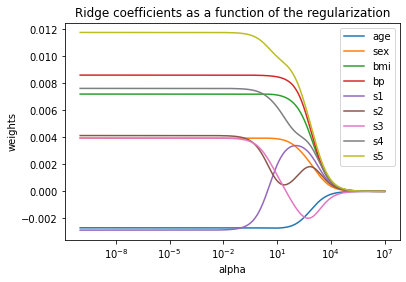

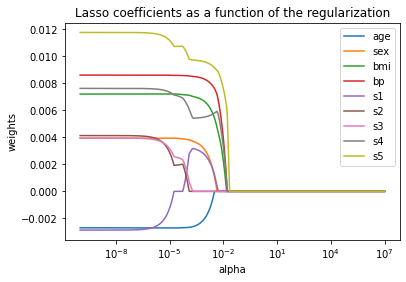

In [44]:
#Visualization of coefficients' values

alphas = np.logspace(-10, 7, 1000)
Ridge_coefs = []
Lasso_coefs = []

for a in alphas:

    ridge = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha = a, fit_intercept=True,tol=0.001)).fit(X, y).named_steps['ridge']
    Ridge_coefs.append(ridge.coef_)

    lasso = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha = a, fit_intercept=True,tol=0.001)).fit(X, y).named_steps['lasso']
    Lasso_coefs.append(lasso.coef_)

#Ridge regression coefficients' values 
ax = plt.gca()
ax.plot(alphas, Ridge_coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(X.columns)
plt.show()

#Lasso regression coefficients' values 
ax = plt.gca()
ax.plot(alphas, Lasso_coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(X.columns)
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e-03, tolerance: 1.000e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e-03, tolerance: 1.000e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of t

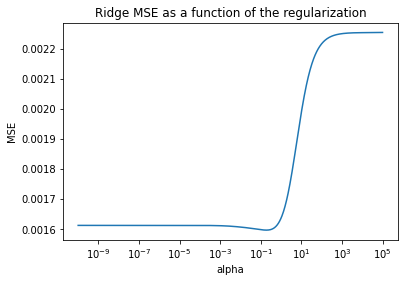

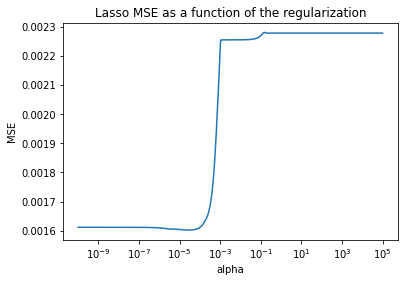

In [45]:
#Visualization of CV MSE

alphas = np.logspace(-10, 5, 1000)
Ridge_MSE = []
Lasso_MSE = []

for a in alphas:
    ridge = ridge = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha = a, fit_intercept=True,tol=0.001)).fit(X, y).named_steps['ridge']
    Ridge_MSE.append(-np.mean(cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)))

    lasso= make_pipeline(StandardScaler(with_mean=False), Lasso(alpha = a, fit_intercept=True,tol=0.001)).fit(X, y).named_steps['lasso']
    Lasso_MSE.append(-np.mean(cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)))

#Ridge regression coefficients' values 
ax = plt.gca()
ax.plot(alphas, Ridge_MSE)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Ridge MSE as a function of the regularization')
plt.axis('tight')
plt.show()

#Lasso regression coefficients' values 
ax = plt.gca()
ax.plot(alphas, Lasso_MSE)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso MSE as a function of the regularization')
plt.axis('tight')
plt.show()

### Excercise 3

Run a Lasso model on the airbnb dataset. What can you conclude about it?

**Answer**

### Excercise 4

Run a Ridge Model on the airbnb dataset. What can you conclude about it?

**Answer**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>